# Linear Regression Project

For this project, I have used [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) available on kaggle.

**About the dataset:** Columns:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [31]:
#   importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('datasets_13720_18513_insurance.csv')

In [2]:
# Getting essence of our data!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no missing value in this dataset which is really rare in practical world.

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [4]:
sns.set()

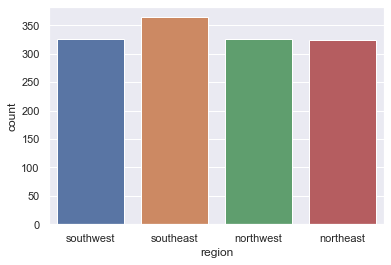

In [5]:
sns.countplot(data.region);

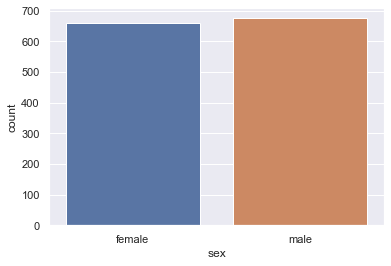

In [6]:
sns.countplot(data.sex);

Our data is quite balanced with respect to sex and region features.

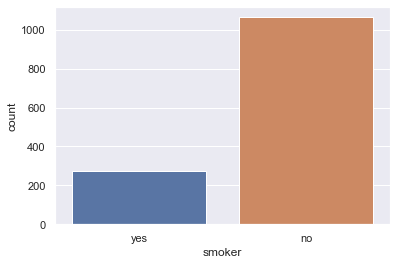

In [7]:
sns.countplot(data.smoker);

There are very less smokers as compared to non-smokers.

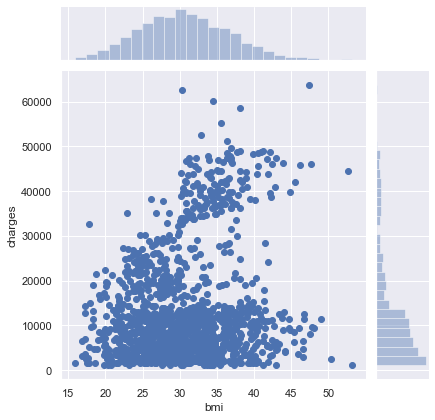

In [8]:
sns.jointplot(data.bmi,data.charges);

There is not clear linear relationship between target variable 'charges' and feature 'bmi'.

Let's explore our target variable which is _charges_. Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression.

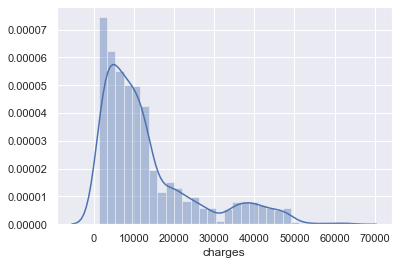

In [9]:
sns.distplot(data.charges);

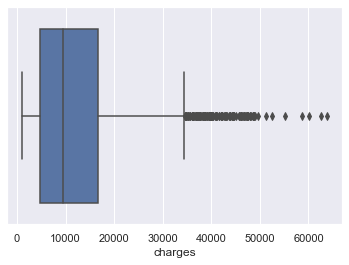

In [32]:
sns.boxplot(data.charges);

Target variable is not normally distributed.Let's apply logarithmic transformation to solve this problem.

In [11]:
data.charges = np.log(data.charges)

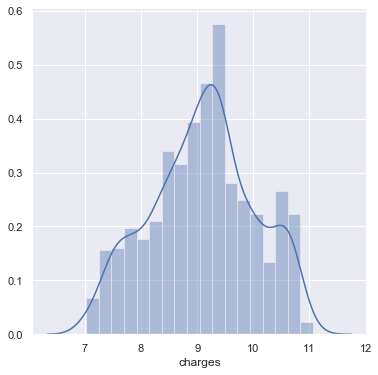

In [12]:
plt.figure(figsize=(6,6))
sns.distplot((data.charges));

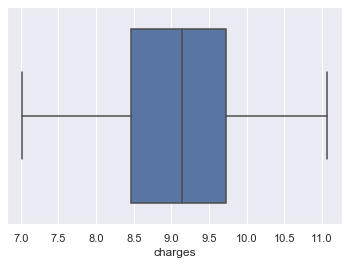

In [30]:
sns.boxplot(data.charges);

Seems better.

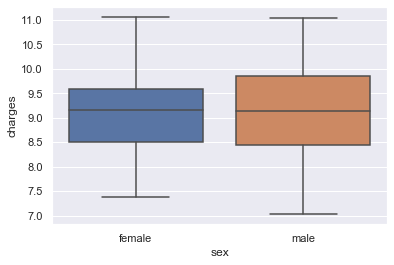

In [13]:
sns.boxplot(x='sex',y='charges',data=data)

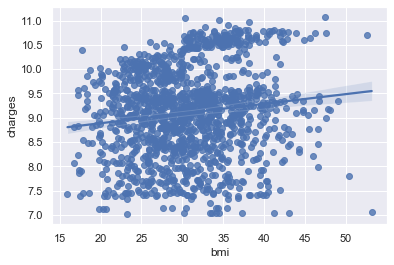

In [14]:
sns.regplot(data.bmi,data.charges)

Assumption of homoscedasticity seems satisfied.

### Converting categorical columns into numerical ones using dummy variables

In [15]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [33]:
dummies = pd.get_dummies(data[['sex','smoker','region']],drop_first=True)
dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [17]:
df_dummies = pd.concat([data,dummies],axis=1)

In [18]:
df_dummies.drop(['sex','smoker', 'region','charges'],axis=1,inplace=True)

In [19]:
df_dummies.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0
2,28,33.00,3,1,0,0,1,0


Now, our dataset is ready for regression.

### Splitting data into train and test sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df_dummies
y=data.charges
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Applying regression using sklearn

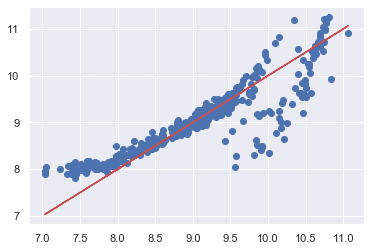

In [22]:
# importing 
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)

# Our predictions
plt.scatter(y_test,pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r');

### Evaluating the model

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [24]:
mean_absolute_error(y_test,pred_lm)


0.2648814863888865

In [25]:
np.sqrt(mean_squared_error(y_test,pred_lm))

0.4167070134049438

In [26]:
explained_variance_score(y_test,pred_lm)

0.7907320271794884

In [27]:
r2_score(y_test,pred_lm)

0.7907225505003613

So, this model explains 79% variance of the target variable.

## Applying regression using statsmodel

In [28]:
import statsmodels.api as sm


In [29]:
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              8593.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:15:14   Log-Likelihood:                         -2207.7
No. Observations:                1338   AIC:                                      4431.
Df Residuals:                    1330   BIC:                                      4473.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0663      0.002     28.826      0.000       0.062       0.071
bmi                  0.1723      0.004     46.271      0.000       0.165       0.180
children             0.2117      0.029      7.415      0.000       0.156       0.268
sex_male             0.2392      0.069      3.478      0.001       0.104       0.374
smoker_yes           1.8335      0.086     21.385      0.000       1.665       2.002
region_northwest     0.7507      0.096      7.790      0.000       0.562       0.940
region_southeast    -0.0118      0.100     -0.119      0.906      -0.207       0.184
region_southwest     0.4541      0.098      4.626      0.000       0.262       0.647
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.278
Skew:                           0.021   Prob(JB):                        0.870
Kurtosis:                       2.943   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION :**

* R-squared (0.977) which is close to 1 implies that our regression line explains a good amount of variation of y.
* A predictor that has a low p-value is likely to be a meaningful addition to our model because changes in the predictor's value are related to changes in the response variable. Seeing p-values in table we can conclude that all our variables are significant except 'region_southeast' which is infact surprising.
* Durbin-Watson test suggests that there is negligible autocorrelation as it is close to 2. Assumption of autocorrelation is also satisfied.